In [1]:
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation
import cv2
from PIL import Image
import requests
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def imwrite_kor(filename, img, params=None): 
    try: 
        ext = os.path.splitext(filename)[1] 
        result, n = cv2.imencode(ext, img, params) 
        if result:
            with open(filename, mode='w+b') as f: 
                n.tofile(f) 
                return True
        else: 
            return False 
    except Exception as e: 
        print(e) 
        return False

In [3]:
processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")
 
path = 'puppy.jpg'
prompts = ["puppy"]
image = Image.open(path)

In [4]:
resizing = torchvision.transforms.Resize(np.array(image).shape[:2])
inputs = processor(text=prompts, images=[image] * len(prompts), padding="max_length", return_tensors="pt")

In [5]:
with torch.no_grad():
    outputs = model(**inputs)
preds = outputs.logits; preds = preds.unsqueeze(0) if len(preds.shape)<=2 else preds; print(preds.shape, resizing)
preds = torch.sigmoid(resizing(preds))
THRESHOLD = 0.5
preds_thresholded = (preds[0] > THRESHOLD).int().numpy()
segmented_image = np.array(image)*np.stack((preds_thresholded,)*3, axis=-1)

torch.Size([1, 352, 352]) Resize(size=(393, 397), interpolation=bilinear, max_size=None, antialias=None)


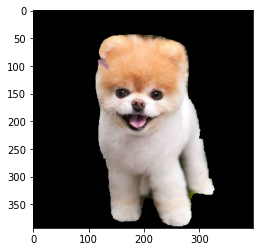

In [6]:
plt.imshow(segmented_image)

In [7]:
type(segmented_image)

numpy.ndarray